In [1]:
import os
import logging
import pandas
from datetime import datetime 

import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import altair as alt
import plotly.graph_objects as go
import plotly.figure_factory as ff


import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests
import json
from time import sleep, time
import lxml
import re
from urllib.parse import urljoin
import unicodedata
from collections import defaultdict, Counter
import WebScrape_Indeed
import WebScrape_LinkedIn
import streamlit as st 
import terms 
import Cities 
import functions
import time
from google.cloud import bigquery, storage
from google_pandas_load import Loader, LoaderQuickSetup
from google_pandas_load import LoadConfig

import chart_studio.plotly 
import plotly.graph_objects as go
import plotly
import pandas as pd

import pydeck as pdk
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)   

import string
import collections
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
from sklearn import metrics


In [2]:
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
def clean(raw):
    raw = ' '.join(raw.tolist())
    for char in '-.,\n':
        raw = raw.replace(char,' ')
    
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    raw = nltk.regexp_tokenize(raw, pattern)
    raw = str(raw)
    return raw

def cleanC(raw):
    raw = ' '.join(raw.tolist())
    for char in '-.,\n':
        raw = raw.replace(char,' ')
    return raw

def C_plus(raw):
    Cplus = re.findall(r'(?i)\bC\+\+(?!\w)', str(raw))
    return Cplus

def C_sharp(raw):
    Csharp = re.findall(r'(?i)\bC\#(?!\w)', str(raw))
    return Csharp


In [4]:
search_terms = terms.total_terms

# st.title('Skill Distribution + Trends')

option1 = 'Data Engineer'
dtotal = pd.read_csv('total_data_date.csv')

dtotal_full = dtotal['description']
dtotal_full = clean(dtotal_full)
dtotal1a= dtotal[dtotal['title'].astype(str).str.contains(option1)]
dtotal1b = dtotal1a['description']
dtotal1c = clean(dtotal1b)

In [5]:
one = pd.read_csv('Indeed.csv')
one = one['description']
one = clean(one)

two = pd.read_csv('LinkedIn.csv')
two = two['description']
two = clean(two)

In [6]:
option2 = 'Data Analyst'

dtotal2a= dtotal[dtotal['title'].astype(str).str.contains(option2)]
dtotal2b = dtotal2a['description']
dtotal2c = clean(dtotal2b)

In [7]:
option3 = 'Data Scientist'

dtotal3a= dtotal[dtotal['title'].astype(str).str.contains(option3)]
dtotal3b = dtotal3a['description']
dtotal3c = clean(dtotal3b)

In [8]:
option4 = 'Software Engineer'

dtotal4a= dtotal[dtotal['title'].astype(str).str.contains(option4)]
dtotal4b = dtotal4a['description']
dtotal4c = clean(dtotal4b)

In [9]:
articles = [dtotal1c,dtotal2c,dtotal3c,dtotal4c,one,two]
# clusters = cluster_texts(articles, 2)


In [10]:
vectorizer = TfidfVectorizer(tokenizer=None,
                                 stop_words=stopwords.words('english'),
                                 max_df=1.0,
                                 min_df=0.0,
                                 lowercase=True)
 

X = vectorizer.fit_transform(dtotal['description'])
X = X.toarray()
# y_hat = km.predict(X)

# clustering = collections.defaultdict(list)
 
# for idx, label in enumerate(km.labels_):
#     clustering[label].append(idx)

In [11]:
from sklearn.decomposition import PCA

In [12]:
N=1000
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5630 samples in 0.002s...
[t-SNE] Computed neighbors for 5630 samples in 0.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5630
[t-SNE] Computed conditional probabilities for sample 2000 / 5630
[t-SNE] Computed conditional probabilities for sample 3000 / 5630
[t-SNE] Computed conditional probabilities for sample 4000 / 5630
[t-SNE] Computed conditional probabilities for sample 5000 / 5630
[t-SNE] Computed conditional probabilities for sample 5630 / 5630
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.078499
[t-SNE] KL divergence after 300 iterations: 1.477723
t-SNE done! Time elapsed: 10.44004201889038 seconds


In [22]:
one = tsne_results[:,0]
two = tsne_results[:,1]

In [24]:
two

array([ 3.1342437,  2.4342895,  6.720619 , ...,  0.883013 ,  1.1765983,
       10.98327  ], dtype=float32)

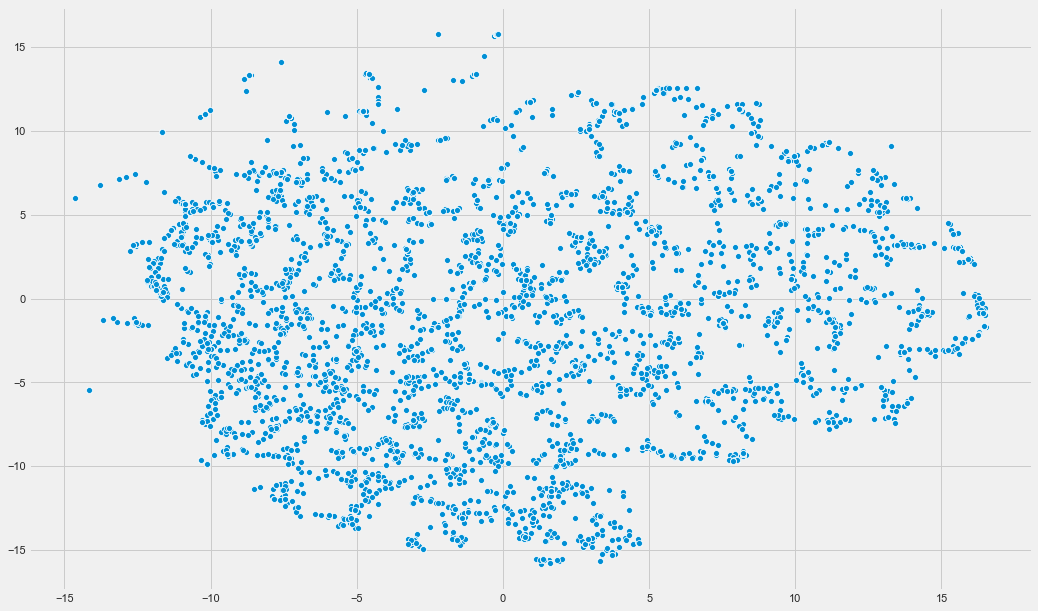

In [31]:

plt.figure(figsize=(16,10))
sns.scatterplot(x=one, y=two);

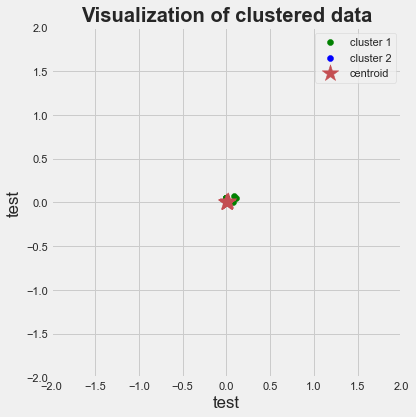

In [14]:
X = vectorizer.fit_transform(dtotal['description'])
km = KMeans(n_clusters=6, max_iter=100)
km.fit(X)
centroids = km.cluster_centers_
X = X.toarray()

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('test')
plt.ylabel('test')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [15]:
plt.scatter(X[:, 0], X[:, 1], c = y_hat)
cl_centers = km.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100);

NameError: name 'y_hat' is not defined

In [ ]:
labels = km.labels_

metrics.silhouette_score(X, labels, metric='euclidean')

In [ ]:
metrics.calinski_harabaz_score(X, labels)

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))
# plt.scatter(tfidf_model[km.labels_], tfidf_model[km.labels_], label='cluster 1')
# plt.scatter(tfidf_model[km.labels_ == 1, 0], tfidf_model[km.labels_ == 1, 1],c='blue', label='cluster 2')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,c='r', label='centroid')
# plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.xlabel('Eruption time in mins')
# plt.ylabel('Waiting time to next eruption')
# plt.title('Visualization of clustered data', fontweight='bold')
# ax.set_aspect('equal');

In [ ]:
# vectorizer = TfidfVectorizer(tokenizer=None,
#                                  stop_words=stopwords.words('english'),
#                                  max_df=1.0,
#                                  min_df=0.0,
#                                  lowercase=True)
 
# tfidf_model = vectorizer.fit_transform(dtotal_full)
# km = KMeans(n_clusters=2, max_iter=100)
# km.fit(tfidf_model)
# centroids = km.centroids

# Plot the clustered data


In [ ]:

# X_embedded = tsne.fit_transform(X)

In [ ]:
# tsne = TSNE()

In [ ]:
# def cluster_texts_tsne(texts, nclusters=3):
# #     vectorizer = TfidfVectorizer(tokenizer=None,
# #                                  stop_words=stopwords.words('english'),
# #                                  max_df=1.0,
# #                                  min_df=0.0,
# #                                  lowercase=True)
    
    
#     tsne = TSNE(n_components=4, init='random', random_state=0)
#     tsne_proj = tsne.fit_transform(texts)
#     km_model = KMeans(n_clusters=nclusters, random_state=0)
#     km_model.fit(tsne_proj)
    
# #     labels = np.zeros_like(clusters)
# #     for i in range(nclusters):
# #         mask = (clusters == i)
# #         labels[mask] = mode(texts.target[mask])[0]
        
# #     accuracy_score(texts.target, labels)
 
#     clustering = collections.defaultdict(list)
 
#     for idx, label in enumerate(km_model.labels_):
#         clustering[label].append(idx)
 
#     return clustering
 
# if __name__ == "__main__":
#     articles = [dtotal1c,dtotal2c,dtotal3c,dtotal4c]
#     clusters = cluster_texts_tsne(articles, 2)
#     pprint(dict(clusters))